# Prediccion de demanda sobre ventas de comida

Es una empresa de entrega de comidas que opera en varias ciudades. Tienen varios centros logísticos en estas ciudades para enviar pedidos de comida a sus clientes. El cliente quiere que usted ayude a estos centros con la previsión de la demanda para las próximas semanas para que estos centros planifiquen el stock de materias primas en consecuencia.

Dada la siguiente información, la tarea es predecir la demanda durante las próximas 10 semanas (semanas: 146-155) para las combinaciones de comida central en el conjunto de prueba.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test = pd.read_csv('C:/Users/matia/Desktop/MATIAS/DATA/Datasets Practica/Food Demand Forecasting/test.csv')
train = pd.read_csv('C:/Users/matia/Desktop/MATIAS/DATA/Datasets Practica/Food Demand Forecasting/train.csv')

In [3]:
# Agrupar los datos por semana y sumar las ventas
ventas_por_semana = train.groupby('week')['num_orders'].sum().reset_index()

# Renombrar las columnas para mayor claridad
ventas_por_semana.columns = ['week', 'sum_num_orders']

# Mostrar el nuevo DataFrame
ventas_por_semana

,week,sum_num_orders
0,1,792261
1,2,787084
2,3,695262
3,4,743529
4,5,1198675
...,...,...
140,141,776240
141,142,739661
142,143,759926
143,144,801197


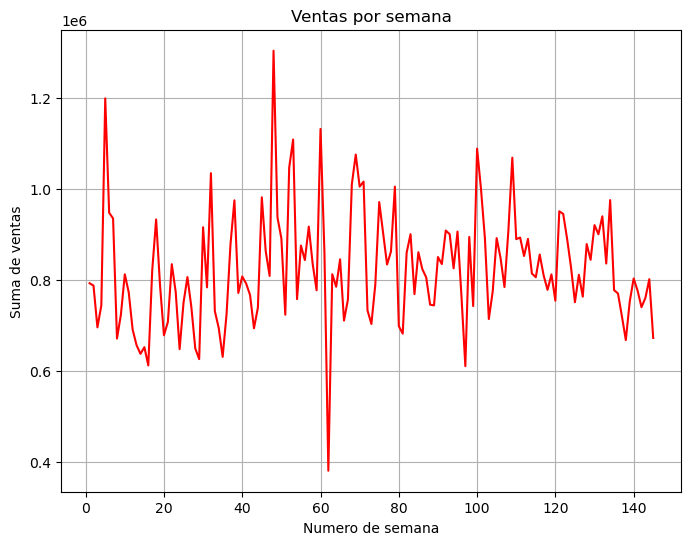

In [4]:
# Graficar las ventas por semana
plt.figure(figsize=(8, 6)) # 800x600 px
# plt.scatter(ventas_por_semana['week'], ventas_por_semana['sum_num_orders'], color='deeppink')
plt.plot(ventas_por_semana['week'], ventas_por_semana['sum_num_orders'], color='red')
plt.title('Ventas por semana')
plt.xlabel('Numero de semana')
plt.ylabel('Suma de ventas')
plt.grid(True)
plt.show()

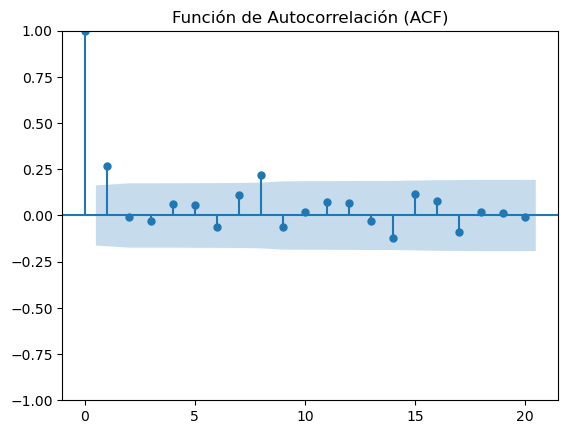

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

## Gráfico de la función de autocorrelación (ACF)
plot_acf(ventas_por_semana['sum_num_orders'], lags=20)
plt.title('Función de Autocorrelación (ACF)')
plt.show()

In [6]:
# Define una función para calcular el MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Supongamos que tienes una serie temporal llamada 'ventas_por_semana'

# Define el rango de valores para 'm' que deseas explorar
m_values = [2, 4, 6, 8, 10, 12]  # Puedes ajustar esto según tu frecuencia estacional

best_mape = float('inf')  # Inicializa el mejor MAPE con un valor infinito
best_m = None  # Inicializa el mejor valor de 'm' como None

# Itera sobre los valores de 'm' y encuentra el mejor MAPE
for m in m_values:
    modelo_auto = auto_arima(ventas_por_semana['sum_num_orders'], seasonal=True, m=m)
    predicciones = modelo_auto.predict_in_sample()
    mape = mean_absolute_percentage_error(ventas_por_semana['sum_num_orders'], predicciones)
    
    if mape < best_mape:
        best_mape = mape
        best_m = m

# Utiliza el mejor valor de 'm' encontrado
modelo_auto_final = auto_arima(ventas_por_semana['sum_num_orders'], seasonal=True, m=best_m)

# Imprime un resumen del modelo ajustado
print(modelo_auto_final.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  145
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 8)   Log Likelihood               -1894.618
Date:                           Thu, 25 Apr 2024   AIC                           3801.237
Time:                                   21:27:07   BIC                           3819.097
Sample:                                        0   HQIC                          3808.494
                                           - 145                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.222e+05   2.52e+04     32.650      0.000    7.73e+05    8.72e+05
ma.L1          0.3537      0.101      3.516

In [7]:
pronostico = modelo_auto.predict_in_sample()
pronostico

0      822235.010948
1      811853.568796
2      810449.736641
3      778713.302111
4      796603.011121
           ...      
140    807266.090168
141    869459.592910
142    743348.844945
143    815387.487537
144    773650.784413
Name: predicted_mean, Length: 145, dtype: float64

In [8]:
# Número de semanas para pronosticar
num_semanas = 10

# Obtén las predicciones para las próximas 10 semanas
pronostico_prox_semanas = modelo_auto.predict(n_periods=num_semanas)

In [9]:
# Supongamos que ya has ejecutado el pronóstico para las próximas 10 semanas
fitted, confint = modelo_auto.predict(n_periods=num_semanas, return_conf_int=True)

# Extrae los límites inferior y superior del intervalo de confianza
confianza_inf = confint[:, 0]
confianza_sup = confint[:, 1]

c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\matia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

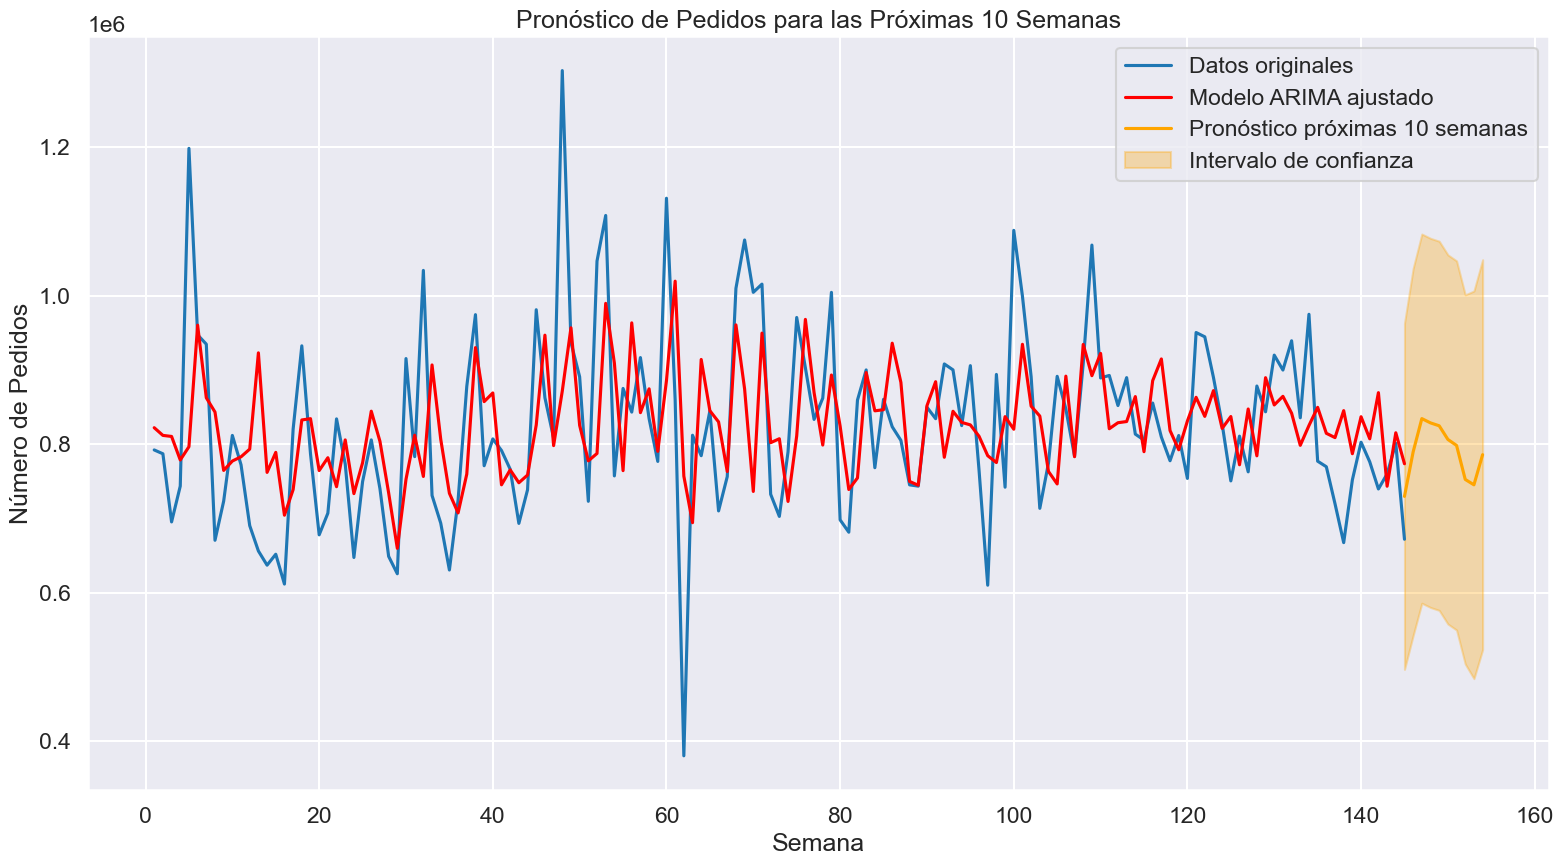

In [12]:
import seaborn as sns

plt.figure(figsize=(16, 9)) # 800x600 px

# Establece el estilo y el contexto de Seaborn
sns.set_style("darkgrid")
sns.set_context("talk")

# Crea un rango de índices para las próximas 10 semanas
indice_prox_semanas = np.arange(len(ventas_por_semana), len(ventas_por_semana) + num_semanas)

# Grafica los datos originales
sns.lineplot(x=ventas_por_semana['week'], y=ventas_por_semana['sum_num_orders'], label='Datos originales')

# Visualiza el modelo ARIMA ajustado
sns.lineplot(x=ventas_por_semana['week'], y=pronostico, color='red', label='Modelo ARIMA ajustado')

# Grafica las predicciones para las próximas 10 semanas
sns.lineplot(x=indice_prox_semanas, y=pronostico_prox_semanas, color='orange', label='Pronóstico próximas 10 semanas')

# Rellena el área entre los límites inferior y superior del intervalo de confianza
plt.fill_between(indice_prox_semanas, 
                 confianza_inf, 
                 confianza_sup, 
                 color='orange', alpha=.3, label='Intervalo de confianza')

plt.legend()
plt.title('Pronóstico de Pedidos para las Próximas 10 Semanas')
plt.xlabel('Semana')
plt.ylabel('Número de Pedidos')
plt.tight_layout()  # Ajusta el diseño para evitar que los elementos se superpongan
plt.show()

In [14]:
# Error de Porcentaje Absoluto Medio (MAPE)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape_score = mape(ventas_por_semana['sum_num_orders'], pronostico)
print("MAPE:", mape_score)

# Correlación entre los valores reales y pronosticados (corr)
corr = np.corrcoef(ventas_por_semana['sum_num_orders'], pronostico)[0, 1]
print("Correlación:", corr)

MAPE: 10.586936856143101
Correlación: 0.4176892852889774


c:\Users\matia\anaconda3\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,2)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\Users\matia\anaconda3\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\Users\matia\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "c:\Users\matia\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "c:\Users\matia\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "c:\Users\matia\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefit = s

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  145
Model:             SARIMAX(0, 0, 2)x(0, 0, 2, 8)   Log Likelihood               -1894.618
Date:                           Thu, 25 Apr 2024   AIC                           3801.237
Time:                                   21:39:12   BIC                           3819.097
Sample:                                        0   HQIC                          3808.494
                                           - 145                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   8.222e+05   2.52e+04     32.650      0.000    7.73e+05    8.72e+05
ma.L1          0.3537      0.101      3.516